# This example shows how to setup a simple traveling-wave accelerating structure

In [1]:
%plot -f SVG

In [2]:
RF_Track;


RF-Track, version 2.2.3

Copyright (C) 2016-2024 CERN, Geneva, Switzerland. All rights reserved.

Author and contact:
 Andrea Latina <andrea.latina@cern.ch>
 BE-ABP Group
 CERN
 CH-1211 GENEVA 23
 SWITZERLAND

This software is distributed under a CERN proprietary software
license in the hope that it will be useful, but WITHOUT ANY WARRANTY;
not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

See the COPYRIGHT and LICENSE files at the top-level directory of
the RF-Track download area: https://gitlab.cern.ch/rf-track/download

RF-Track was compiled with GSL-2.7 and fftw-3.3.10



## Structure parameters

In [3]:
a0 = 1.0; % V/m, principal Fourier coefficient
freq = 12e9; % Hz
ph_adv = 2*pi/3; % radian, phase advance per cell
n_cells = 3; % number of cells, negative sign indicates a start from the beginning of the cell

## Create a structure and sets its reference time

In [4]:
TW = TW_Structure(a0, 0, freq, ph_adv, n_cells);

## Let's plot the field using the method ```Element::get_field(x, y, z, t)```
* $x$, $y$, $z$ are in mm
* $t$ is in mm/$c$

These coordinates can be vectors to get the field at several points in just one call.

This function returns both the electric and the magnetic fields

In [5]:
[E,B] = TW.get_field(1, 3, 5, 0)

E =

   0.038755
   0.116265
  -0.951325

B =

  -3.8782e-10
   1.2927e-10
            0



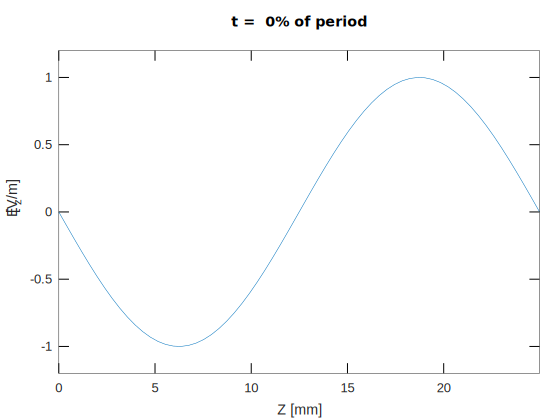

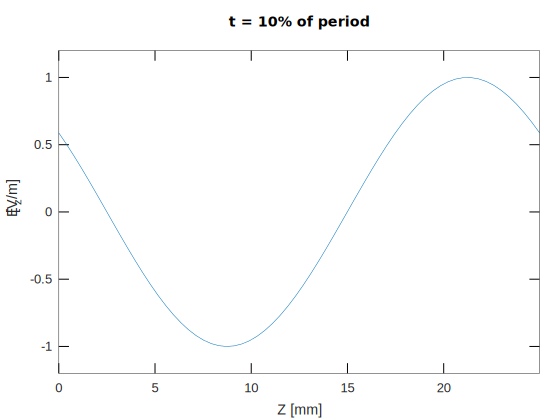

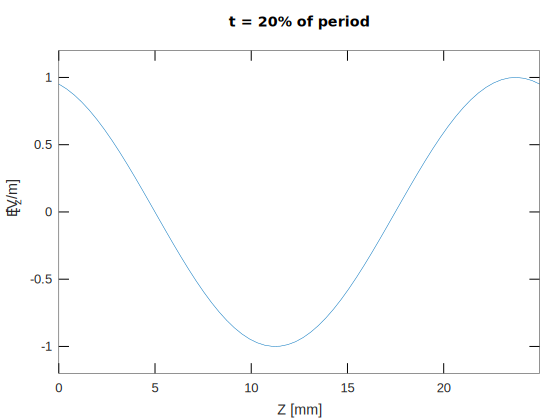

In [6]:
TW.set_t0(0.0); % set the reference time

T_period = TW.get_period(); % mm/c

Z = linspace(0, TW.get_length()*1e3, 64); % mm
O = zeros(size(Z));
I = ones(size(Z));

for t = [ 0.0 0.1 0.2 ]*T_period

    % read the field along the axis
    [E,B] = TW.get_field(O, O, Z, t*I);

    % plot the field Ez
    figure;
    plot(Z, E(:,3));
    title(sprintf('t = %2.f%% of period', t*100/T_period));
    xlabel('Z [mm]');
    ylabel('E_z [V/m]');
    axis([ 0 Z(end) -a0*1.2 a0*1.2 ]);

end

In [9]:
[E,B] = TW.get_field(3*I, O, Z, t*I);
E_field = E(1:10,:)
B_field = B(1:10,:)

E_field =

   0.1166        0   0.9511
   0.1517        0   0.9156
   0.1854        0   0.8710
   0.2172        0   0.8177
   0.2468        0   0.7563
   0.2740        0   0.6874
   0.2984        0   0.6117
   0.3199        0   0.5299
   0.3382        0   0.4428
   0.3532        0   0.3514

B_field =

            0   3.8886e-10            0
            0   5.0609e-10            0
            0   6.1829e-10            0
            0   7.2434e-10            0
            0   8.2320e-10            0
            0   9.1387e-10            0
            0   9.9547e-10            0
            0   1.0672e-09            0
            0   1.1283e-09            0
            0   1.1781e-09            0

